# Matplotlib.pyplot c.d. - specjalistyczne metody wizualizacji danych II

## Słownik - przypomnienie

Słownik jest kolejnym typem danych w Pythonie. Elementami słownika są pary składające się z *nazwy-klucza* oraz *wartości*. Przykładowo w tradycyjnym słowniku kluczem będzie słowo, a wartością jego tłumaczenie na inny język. Kolejny przykład: każda injekcja $f:X\to Y$ będzie *słownikiem*, gdzie kluczem będzie argument $x$, a wartością $f(x)$.

Słownik tworzymy w następujący sposób:

In [1]:
zwierz={}

zwierz['Mruczek']='kot lat 3'
zwierz['Mysza']='kot lat 4'
zwierz['Azor']='pies lat 12'

W przeciwieństwie do listy słowniki nie mają kolejności. Odwołanie do poszczególnych elementów następuje za pomocą użycia *klucza*.

In [2]:
print(zwierz['Mruczek'])

kot lat 3


Jeżeli nie znamy (lub nie pamiętamy) listy kluczy, wystarczy wywołać funkcję *keys*

In [3]:
print(zwierz.keys())

dict_keys(['Mruczek', 'Mysza', 'Azor'])


## Wykres skrzypcowy - violinplot

Standardowo zamiast pełnej nazwy biblioteki `matplotlib.pyplot` będziemy używać skrótu `plt`.

Wykres skrzypcowy jest pewnego rodzaju odmianą wykresu pudełkowego: oprócz wszystkich danych przedstawionych przez wykres pudełkowy (mediana, rozpiętość zakresu ćwiartkowego, ,,wąsy'' równe długości półtora zakresu ćwiartkowego, oznaczenie pojedynczych punktów z poza zakresu) obrazuje też gęstość rozkładu próbkowanej zmiennej losowej w postaci jądrowego estymatora gęstości (kolokwialnie mówiąc: taki wygładzony, ciągły histogram).

Do tworzenia wykresu skrzypcowego służy funkcja `violinplot`. Otrzymany domyślny wykres skrzypcowy nie ma zaznaczonego punktu mediany a zakres ,,wąsów'' jest od min do max danych w zbiorze, brak również oznaczeń punktów z poza zakresu. Podstawowa składnia jest następująca:

`plt.violinplot(dane, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None)`, gdzie:

 - `dane` - macierz lub lista (krotka) wektorów; w przypadku tablicy każda kolumna jest traktowana jako osobny zbiór danych.
 - `positions` - lista lub n-krotka położeń poszczególnych wykresów względem osi OX.
 - `vert=True/False` - jeżeli `False`, to otrzymamy wykresy poziome.
 - `widths` - liczba lub lista (krotka); ustawienie szerokości poszczególnych wykresów.
 - `showmeans=True/False` - jeżeli `True`, to zostaną pokazane dodatkowe kreski oznaczające średnią.
 - `showextrema=True/False` - włącza/wyłącza widoczność ,,wąsów'' wraz z punktami ekstremalnymi.
 - `showmedians=True/False` - włącza/wyłącza zaznaczenie mediany za pomocą dodatkowej kreski.
 - `points` - liczba określająca liczbę punktów wziętych do ewaluacji estymatora gęstości (więcej punktów = dokładniejsza ewaluacja).
 - `bw_method` - metoda użyta do ewaluacji estymatora. Podstawowe metody do wyboru: `‘scott’`, `‘silverman’`.

Lista opcji, które możemy modyfikować przy wywoływaniu funkcji `violinplot` jest dość uboga. Aby sformatować wykres według naszych preferencji musimy formatować bezpośrednio słownik, który jest zwracany przez `violinplot`. Klucze zwracanego słownika:

 - `bodies` - lista elementów typu `matplotlib.collections.PolyCollection` opisujących zacieniowane obszary wykresów.
 - `cmeans` - element typu `matplotlib.collections.LineCollection` opisujący linie oznaczające średnie.
 - `cmedians` - element typu `matplotlib.collections.LineCollection` opisujący linie oznaczające mediany.
 - `cmins` - element typu  `matplotlib.collections.LineCollection` opisujący linię dolną ,,wąsów''.
 - `cmaxes` - element typu  `matplotlib.collections.LineCollection` opisujący linię górną ,,wąsów''.
 - `cbars` - element typu  `matplotlib.collections.LineCollection` opisujący ,,wąsy''.

Przykładowy domyślny wykres skrzypcowy:

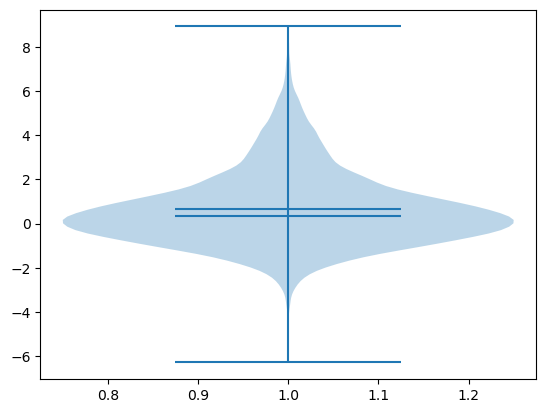

In [4]:
import numpy as np
import matplotlib.pyplot as plt

A=np.random.randn(10000)
B=2+2*np.random.randn(5000)
C=np.concatenate((A,B))


violin=plt.violinplot(C,vert=True,showmedians=True,showmeans=True,showextrema=True)

Ten sam wykres po modyfikacji:

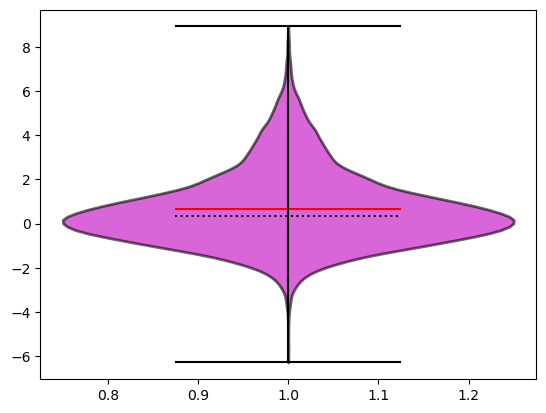

In [5]:
violin=plt.violinplot(C,vert=True,showmedians=True,showmeans=True,showextrema=True)
violin['cmeans'].set_edgecolor('r')
violin['cmedians'].set_linestyles('dotted')
violin['cmedians'].set_edgecolor('k')

for par in ('cbars','cmins','cmaxes'):
    violin[par].set_edgecolor('k')
    
for bd in violin['bodies']:
    bd.set_linewidth(2)
    bd.set_edgecolor('k')
    bd.set_facecolor('m')
    bd.set_alpha(0.6)       #wspolczynnik przezroczystosci
    
plt.show(violin)

## Wykres punktowy

Wykres punktowy obrazuje dane reprezentowane przez dwie zmienne w kartezjańskim układzie współrzędnych.

Funkcja do tworzenia wykresu punktowego to

`plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None)`, gdzie:

 - `x,y` - macierze (listy, krotki) współrzędnych punktów wykresu.
 - `s` - liczba lub macierz (lista, krotka) rozmiaru poszczególnych punktów wykresu.
 - `c` - pojedynczy kolor lub lista kolorów poszczególnych punktów wykresu.
 - `marker` - styl punktu (dostępne standardowe style, domyślny `'o'`).
 - `cmap` - użycie jednej ze standardowych map kolorów (opcja dostępna w przypadku, gdy `c` jest w postaci listy floatów).
 - `norm` - użycie jednej ze standardowych map luminancji (opcja dostępna w przypadku, gdy `c` jest w postaci listy floatów).
 - `vmin, vmax` - liczby określająca minimalną i maksymalną luminancję (tylko przy użyciu opcji `norm`).
 - `alpha` - liczba od 0 do 1 określająca przezroczystość.
 - `linewidths` - liczba; grubość linii.
 - `edgecolors` - kolor lub lista kolorów brzegów punktów. Domyślna wartość `'face'`, czyli kolor wypełnienia.

Przykładowy wykres punktowy:

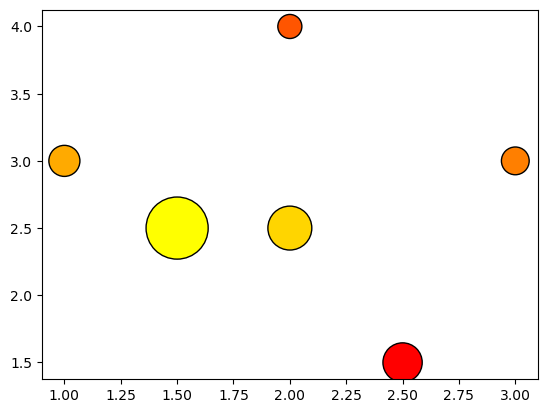

In [6]:
x=[1,2,3,2,1.5,2.5]
y=[3,2.5,3,4,2.5,1.5]
size=[500,1000,400,300,2000,800]

plt.scatter(x,y,s=size,c=[0.3,0.31,0.29,0.28,0.32,0.26],cmap=plt.cm.autumn,marker=None,edgecolors='k')

## Zadanie 1.

Utworzyć dwie listy: jedną zawierającą wszystkie oznaczenia tablic rejestracyjnych w powiatach województwa małopolskiego i drugą zawierającą nazwy powiatów (metodą Ctrl+c, Ctrl+v z pliku `rejestracje.txt`) a następnie za pomocą pętli przekształcić te dwie listy na jeden słownik, w którym kluczem jest oznaczenie a wartością nazwa powiatu.

In [7]:
oznaczenia_tablic=['KR','KK','KN','KT','KBC','KBA','KBR','KCH','KDA','KGR','KRA','KLI','KMI','KMY','KNS','KNT','KOL','KOS','KPR','KSU','KTA','KTT','KWA','KWI']

nazwy_powiatów=['Kraków','Kraków','Nowy Sącz','Tarnów','powiat bocheński (Bochnia)','powiat bocheński (Bochnia)','powiat brzeski (Brzesko)','powiat chrzanowski (Chrzanów)','powiat dąbrowski (Dąbrowa Tarnowska)','powiat gorlicki (Gorlice)','powiat krakowski (Kraków)','powiat limanowski (Limanowa)','powiat miechowski (Miechów)','powiat myślenicki (Myślenice)','powiat nowosądecki (Nowy Sącz)','powiat nowotarski (Nowy Targ)','powiat olkuski (Olkusz)','powiat oświęcimski (Oświęcim)','powiat proszowicki (Proszowice)','powiat suski (Sucha Beskidzka)','powiat tarnowski (Tarnów)','powiat tatrzański (Zakopane)','powiat wadowicki (Wadowice)','powiat wielicki (Wieliczka)']

slownik_tablice_powiaty=dict(zip(oznaczenia_tablic,nazwy_powiatów))


## Zadanie 2.

Napisać skrypt, który po podaniu przez użytkownika oznaczenia rejestracji poda nazwę powiatu. W przypadku podania oznaczenia z poza województwa małopolskiego lub nieistniejącego w ogóle wypisze komunikat 'Oznaczenie nie znajduje się w bazie' (lub coś w tym stylu).

In [8]:
dane_wejsciowe=str(input("Proszę podać oznaczenie: ").upper())
try:
    print(slownik_tablice_powiaty[dane_wejsciowe])
except:
    print("Nieznane oznaczenie")

Kraków


## Zadanie 3.

Utworzyć sześć macierzy (A,B,C,D,E,F), z których każda zawiera co najmniej 10 tys. liczb losowych o rozkładzie normalnym z parametrami rozkładu: A $\mu=0$, $\sigma^2=1$; B $\mu=0$, $\sigma^2=0.5$; C $\mu=3$, $\sigma^2=2$; D $\mu=-2$, $\sigma^2=1.5$; E $\mu=5$, $\sigma^2=2$; F $\mu=-3$, $\sigma^2=0.6$. Narysować domyślne wykresy wiolinowe dla tych sześciu zbiorów danych.

In [9]:
A=np.random.standard_normal(10000)
B=np.random.normal(0,0.5,10000)
C=np.random.normal(3,2,10000)
D=np.random.normal(-2,1.5,10000)
E=np.random.normal(5,2,10000)
F=np.random.normal(-3,0.6,10000)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f43be88fcd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f43be88fc70>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f43be6cc1c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f43be6cc520>}

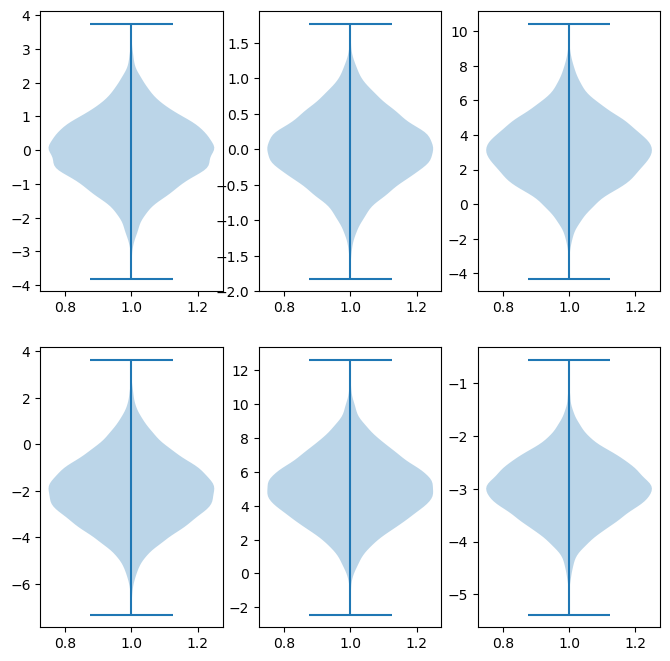

In [10]:
plt.figure(figsize=(8,8))
plt.subplot(2,3,1)
plt.violinplot(A)
plt.subplot(2,3,2)
plt.violinplot(B)
plt.subplot(2,3,3)
plt.violinplot(C)
plt.subplot(2,3,4)
plt.violinplot(D)
plt.subplot(2,3,5)
plt.violinplot(E)
plt.subplot(2,3,6)
plt.violinplot(F)

## Zadanie 4.

Dane z macierzy (parami) A i D, B i E, C i F zrzucić do trzech nowych macierzy X,Y,Z. Narysować histogramy, standardowe wykresy pudełkowe oraz wykresy wiolinowe z zaznaczoną średnią i medianą.

In [11]:
def rysuj_histogram_pudelkowy_wiolinowy(macierz):
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    plt.hist(x=macierz,bins=40,ec="black")
    plt.subplot(1,3,2)
    plt.boxplot(x=macierz)
    plt.subplot(1,3,3)
    plt.violinplot(macierz,showmedians=True,showmeans=True)


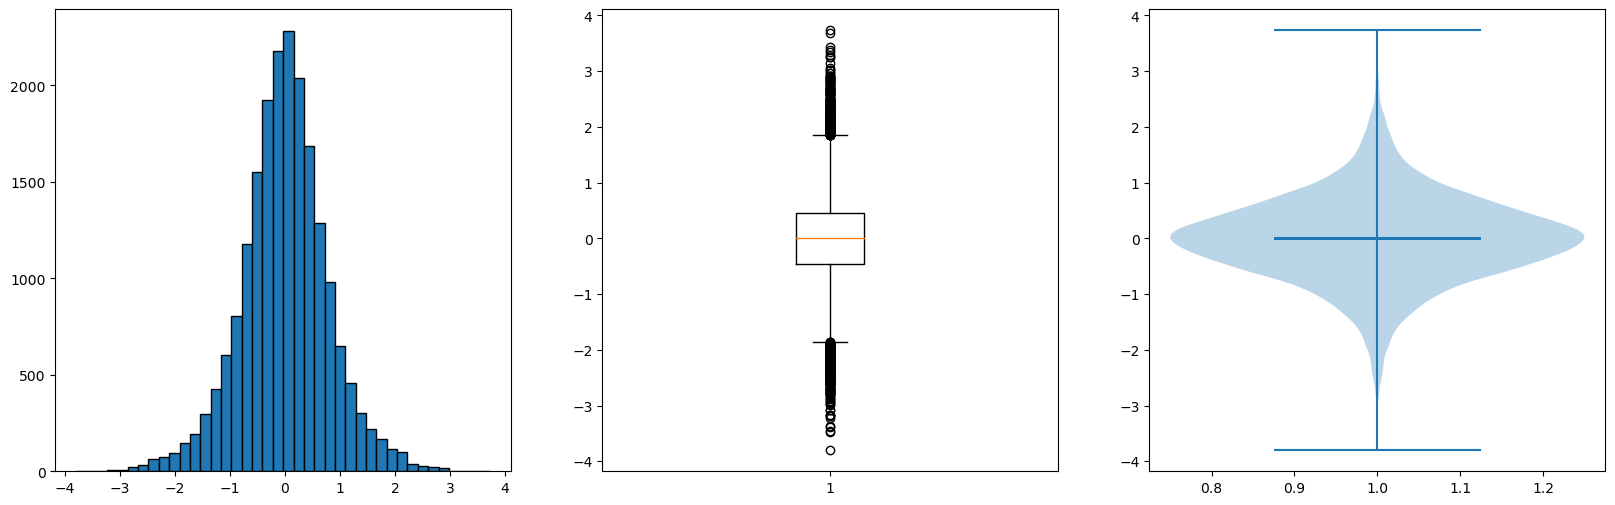

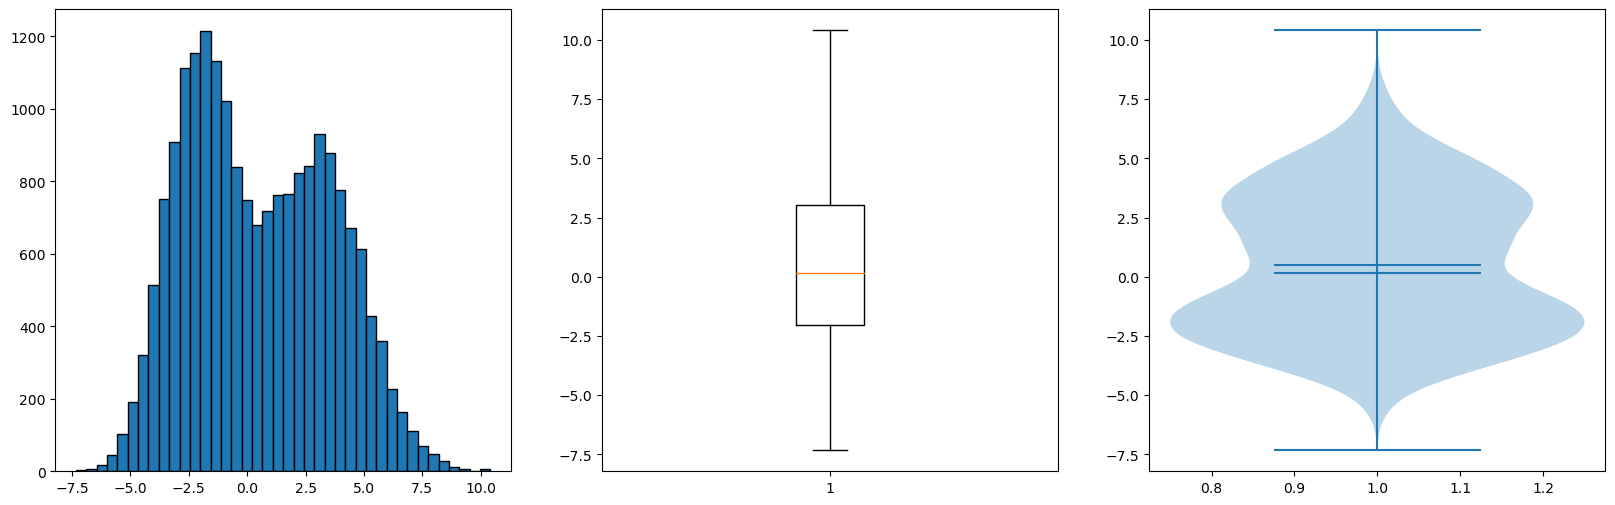

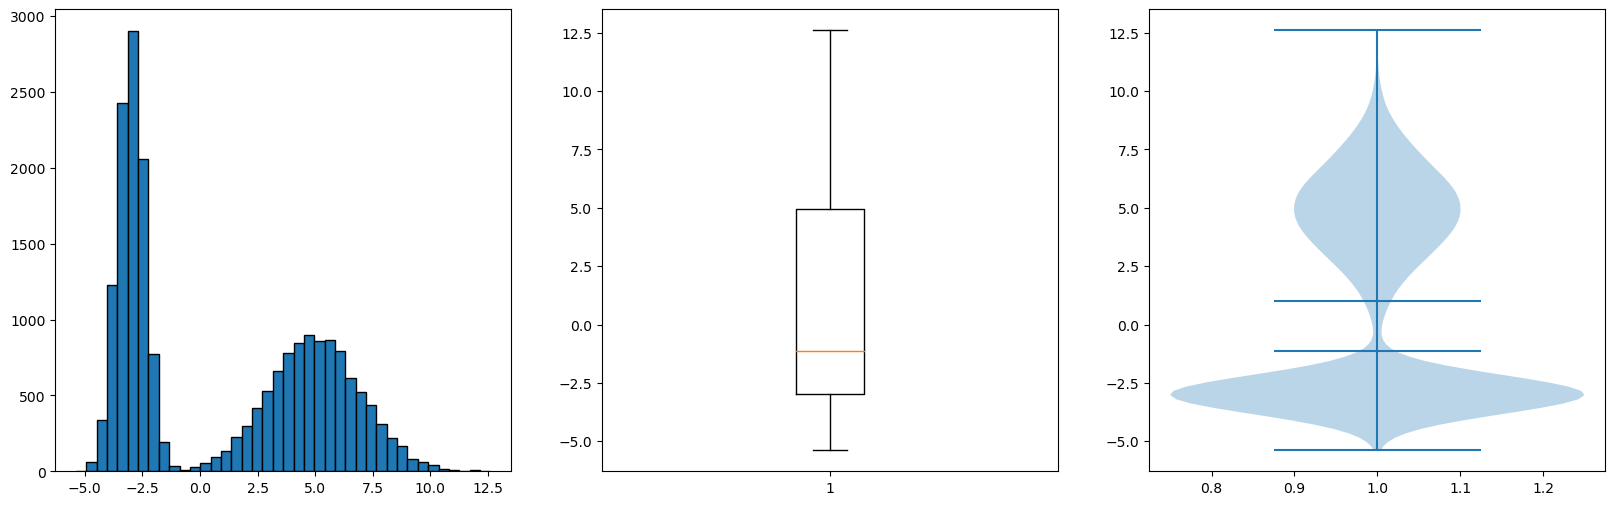

In [12]:
rysuj_histogram_pudelkowy_wiolinowy(macierz=np.concatenate((A,B)))
rysuj_histogram_pudelkowy_wiolinowy(macierz=np.concatenate((C,D)))
rysuj_histogram_pudelkowy_wiolinowy(macierz=np.concatenate((E,F)))


## Zadanie 5.

Korzystając z dokumentacji biblioteki `matplotlib.collections` (https://matplotlib.org/api/collections\_api.html\#module-matplotlib.collections) narysować wykresy wiolinowe danych z Zadania 4 tak, aby każdy wykres miał pole innego koloru, czarne linie (w tym widoczną obwiednię pola) oraz linia mediany odróżniała się stylem od linii średniej.

In [13]:
def rysuj_histogram_pudelkowy_wiolinowy_mod(macierz,kolor_pola):
    plt.figure(figsize=(4,4))
    violin=plt.violinplot(macierz,showmedians=True,showmeans=True)
    violin['cmeans'].set_edgecolor('r')
    violin['cmedians'].set_linestyles('--')
    violin['cmedians'].set_edgecolor('black')

    for par in ('cbars','cmins','cmaxes'):
        violin[par].set_edgecolor('k')
    
    for bd in violin['bodies']:
        bd.set_facecolor(kolor_pola)
        bd.set_edgecolor('black')
        bd.set_linewidth(3)
        bd.set_alpha(1)
        

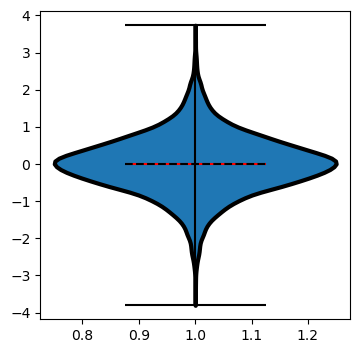

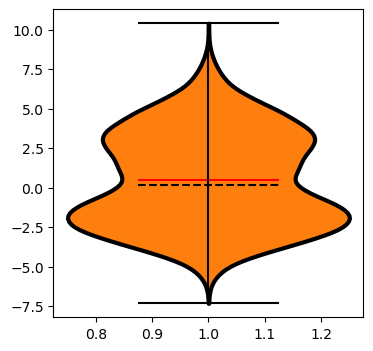

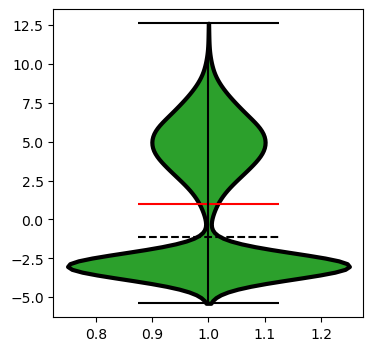

In [14]:
rysuj_histogram_pudelkowy_wiolinowy_mod(macierz=np.concatenate((A,B)),kolor_pola='tab:blue')
rysuj_histogram_pudelkowy_wiolinowy_mod(macierz=np.concatenate((C,D)),kolor_pola='tab:orange')
rysuj_histogram_pudelkowy_wiolinowy_mod(macierz=np.concatenate((E,F)),kolor_pola='tab:green')

## Zadanie 6.

Wśród co najmniej 20 osób zebrać (zdalnie!) następujące dane: Który owoc Pana/Pani zdaniem jest smaczniejszy? Banan czy truskawka? Które warzywo jest smaczniejsze? Pomidor czy ogórek? Zebrane odpowiedzi przedstawić na wykresie punktowym. Rozmiar punktu powinien obrazować liczbę osób, które wybrały daną parę owoc/warzywo. Dobrać kolorystykę. Podpisać osie.

(-0.5, 1.5, -0.5, 1.5)

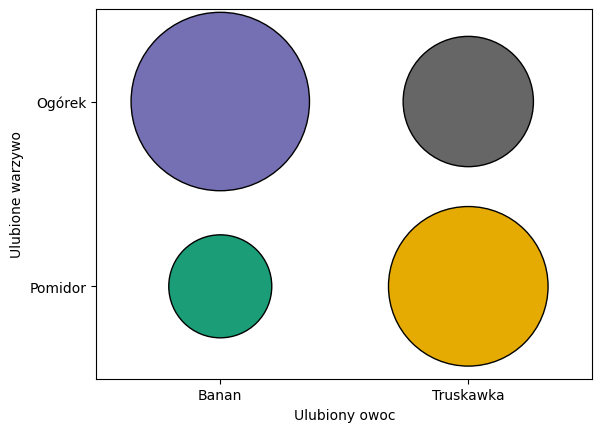

In [15]:
x=['Banan','Banan','Truskawka','Truskawka']
y=['Pomidor','Ogórek','Pomidor','Ogórek']
size=np.array([5,15,12,8])*1100
scat=plt.scatter(x,y,s=size,c=[0,0.1,0.2,0.3],cmap=plt.cm.Dark2,marker=None,edgecolors='k')
plt.ylabel('Ulubione warzywo')
plt.xlabel('Ulubiony owoc')
plt.axis(xmin=-0.5, xmax=1.5, ymin=-0.5, ymax=1.5)